# Option Basics
## Call Option 
\begin{equation*}
\ C = max(0,S-X)
\end{equation*}

## Put Option 
\begin{equation*}
\ P = -min(0,S-X)
\end{equation*}



## PayOff Function

In [2]:
function Option(OptionType,StrikePrice,StockPrice)
        if OptionType == "Call"
           PayOff = max(0,StockPrice - StrikePrice)
        elseif OptionType == "Put"
            PayOff = -min(0,StockPrice - StrikePrice)
        else print("Option Type Not Supported") 
        end
end

Option (generic function with 1 method)

In [3]:
Payoff = Option("Call",100,120)

20

In [4]:
Payoff = Option("Put",100,80)

20

In [ ]:
StockPrice = collect(0:2:200)
LongCall   = Option.("Call",100,StockPrice) #Using Vectorised computations on functions
ShortCall  = -Option.("Call",100,StockPrice)
LongPut    = Option.("Put",100,StockPrice)
ShortPut   = -Option.("Put",100,StockPrice)  

## PayOff Diagrams

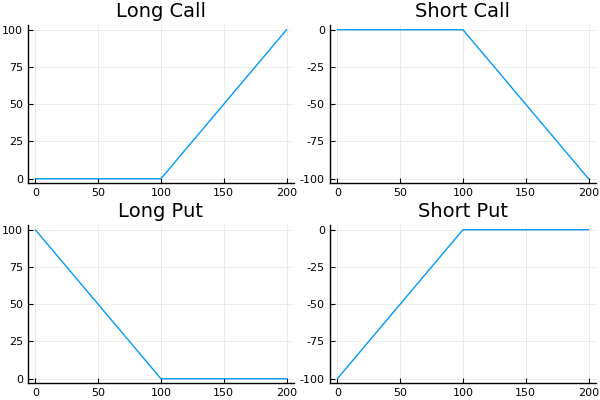

In [8]:
using Plots
pyplot()

p1 = plot(StockPrice,LongCall,title = "Long Call")
p2 = plot(StockPrice,ShortCall,title = "Short Call")
p3 = plot(StockPrice,LongPut,title = "Long Put")
p4 = plot(StockPrice,ShortPut,title = "Short Put")
plot(p1,p2,p3,p4,layout=(2,2),legend=false)

 ## Hedging
 \begin{equation*}
 \ Protective Put = Holding a Stock + Long Put 
 \end{equation*}
 \begin{equation*}
 \ Covered Call = Holding a Stock + Short Call
 \end{equation*}

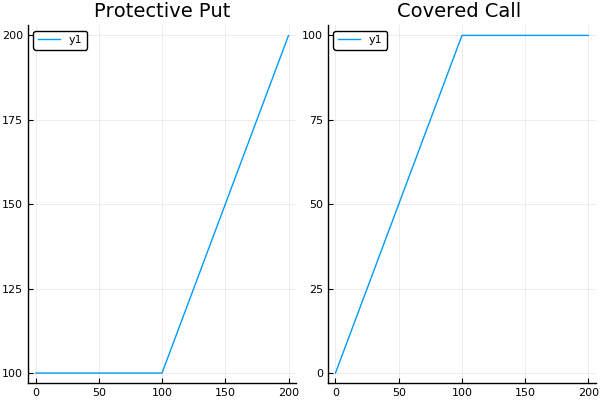

In [9]:
using Plots
pyplot()
ProtectivePut = StockPrice + LongPut
CoveredCall   = StockPrice + ShortCall
pProPut = plot(StockPrice,ProtectivePut,title = "Protective Put")
pCovCall = plot(StockPrice,CoveredCall,title = "Covered Call ")
plot(pProPut,pCovCall,layout= (1,2))

## Spreads
\begin{equation*}
\ Bull Call Spread = Long Call X_L + Short Call X_H 
\text{  for $X_L<X_H$}.
\end{equation*}
\begin{equation*}
\ Bear Put Spread = Long Put X_L + Short Put X_H 
\text{  for $X_L<X_H$}.
\end{equation*}
\begin{equation*}
\ Butterfly Call Spread = Long Call X_L - 2* Call X_M + Long Call X_H 
\text{  for $X_L<X_M < X_H$}.
\end{equation*}
\begin{equation*}
\ Bear Put Spread = Long Put X_L - 2* Put X_M + Long Put X_H
\text{  for $X_L<X_M < X_H$}.
\end{equation*}

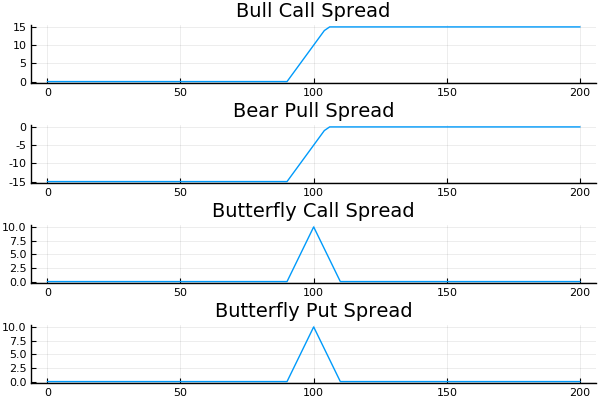

In [10]:
BullCallSpread      = Option.("Call",90,StockPrice)- Option.("Call",105,StockPrice)
BearPutSpread       = Option.("Put",90,StockPrice) - Option.("Put",105,StockPrice)
ButterflySpreadCall = Option.("Call",90,StockPrice)-2*Option.("Call",100,StockPrice) + Option.("Call",110,StockPrice)
ButterflySpreadPut  = Option.("Put",90,StockPrice) -2*Option.("Put",100,StockPrice)  + Option.("Put",110,StockPrice)
pBullCSpread        = plot(StockPrice,BullCallSpread,title= "Bull Call Spread")
pBearPSpread        = plot(StockPrice,BearPutSpread,title = "Bear Pull Spread")
pButterflyCSpread   = plot(StockPrice,ButterflySpreadCall,title = "Butterfly Call Spread")
pButterflyPSpread   = plot(StockPrice,ButterflySpreadPut,title = "Butterfly Put Spread")
plot(pBullCSpread,pBearPSpread,pButterflyCSpread,pButterflyPSpread,layout=(4,1),legend = false)

## In this notebook we have not covered Straddle,Strangle,Strips,Straps.